### Evaluation Metrics

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

#Loading the dataset
df = pd.read_csv("/Users/kalyankumar/Downloads/my_Dataset_classified_RAG_new.csv")

#Cleaning up column names (to fix trailing spaces if any)
df.columns = df.columns.str.strip()

#Ground truth and predictions
y_true = df['status']
y_pred_model = df['predictions_p3']
y_pred_rag = df['Classification_RAG']

#Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_true, y_pred, zero_division=0)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': report
    }

#Evaluating both sets of predictions
eval_model = evaluate_model(y_true, y_pred_model)
eval_rag = evaluate_model(y_true, y_pred_rag)

#Printing results
print("Model 1: predictions_p3")
print(f"Accuracy: {eval_model['Accuracy']:.4f}")
print(f"Precision: {eval_model['Precision']:.4f}")
print(f"Recall: {eval_model['Recall']:.4f}")
print(f"F1 Score: {eval_model['F1 Score']:.4f}")
print("Classification Report:\n", eval_model['Classification Report'])

print("\nModel 2: Classification_RAG")
print(f"Accuracy: {eval_rag['Accuracy']:.4f}")
print(f"Precision: {eval_rag['Precision']:.4f}")
print(f"Recall: {eval_rag['Recall']:.4f}")
print(f"F1 Score: {eval_rag['F1 Score']:.4f}")
print("Classification Report:\n", eval_rag['Classification Report'])


Model 1: predictions_p3
Accuracy: 0.7056
Precision: 0.7776
Recall: 0.7056
F1 Score: 0.7098
Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.57      0.83      0.68        30
            Anxiety        0.00      0.00      0.00         0
             Bipolar       1.00      0.73      0.85        30
          Depression       0.63      0.80      0.71        30
              Normal       0.00      0.00      0.00         0
Personality disorder       1.00      0.40      0.57        30
              Stress       0.73      0.63      0.68        30
            Suicidal       0.74      0.83      0.78        30

            accuracy                           0.71       180
           macro avg       0.58      0.53      0.53       180
        weighted avg       0.78      0.71      0.71       180


Model 2: Classification_RAG
Accuracy: 0.8111
Precision: 0.9525
Recall: 0.8111
F1 Score: 0.8258
Classification Report:
                   

### Model Accuracy Comparison: Phase 1 vs predictions_p3 vs Classification_RAG

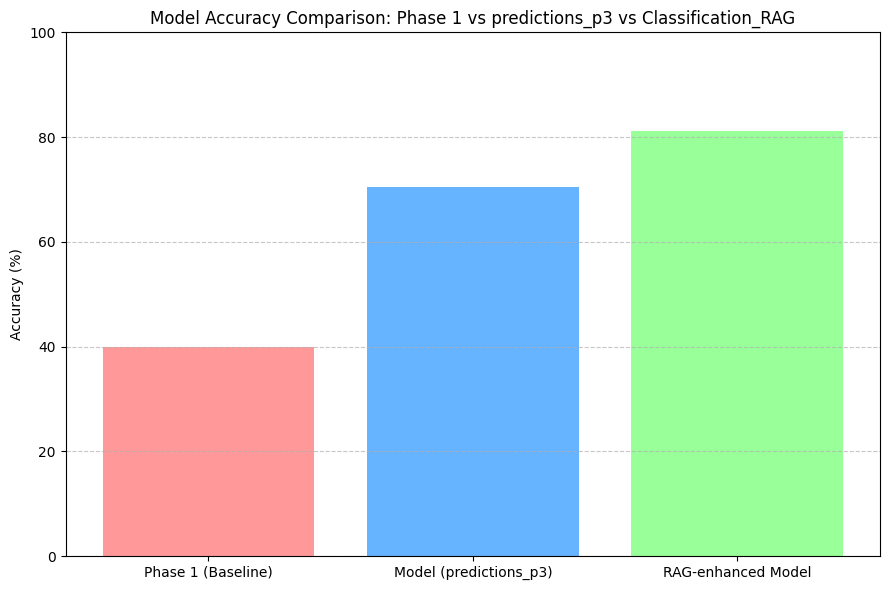

In [3]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_p3 = eval_model['Accuracy'] * 100  # Convert to percentage
accuracy_rag = eval_rag['Accuracy'] * 100
accuracy_phase1 = 40.0  # Hardcoded

# Labels and values
models = ['Phase 1 (Baseline)', 'Model (predictions_p3)', 'RAG-enhanced Model']
accuracies = [accuracy_phase1, accuracy_p3, accuracy_rag]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green (or change as needed)

# Plot
plt.figure(figsize=(9, 6))
plt.bar(models, accuracies, color=colors)
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison: Phase 1 vs predictions_p3 vs Classification_RAG')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()